## Analysis of product star ratings on Amazon

We create a tool that helps you evaluate the distribution of star ratings of Amazon products. You can upload the URL of up to two pages the page where the product is (products are) located and use the tools we provide to perform a simple and also more detailed analysis of the distribution of product ratings. We base our "more nuanced" analysis (which uses ideas from  Bayesian statistics) on the article [How to pick products on Amazon (using bayesian statistics to help you decide)](https://towardsdatascience.com/how-to-pick-products-on-amazon-using-bayesian-statistics-to-help-you-decide-c67335c13a42), (where we copied the idea, but not the code).

## Disclaimer

The programme works only for products with description in english.

In [1]:
# Imports
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

# Import modules
import Scrape_star_reviews_from_Amazon
import Process_scraped_star_reviews
import Plot_and_analyze
import Test_convergence_of_stds_in_model
import two_products_comparison_plotter
import User_friendly_analyzer

## User input

The following function prompts the user for a series of questions, based on which it performs the analysis. The user can perform the analysis of up to two Amazon products simultaneously, by imputting their URL adresses. Then he can specify which plots he wants to see.
For standard histograms, we plot means of ratings in the picture, they can be marginally different from the mean ratings displayed on the Amazon website, due to different rounding procedures.

User can specify (but does not have to, they all default to 1, i.e. uninformative) priors for our model, which fits Dirichlet distribution on the number of distinct star ratings of the Amazon product, then draws random samples from it (we specify the default value of samples drawn to be 1000) and plot them all, together with  means and confidence intervals for each set of samples, on a graph that could be described as a variation on histogram. In the graph, user can see relative proportions of star ratings, that follows from the output of our model.

Aditionally, user can chose to visualize the graph of convergence of standard deviations for all i star samples as they grow (this is achived somewhat artificially in our model, to simplify our Amazon scraping procedure, we assumed that different star ratings are comming essentially at random), to get an idea how much reviews seem to be needed in our model to be reasonably sure about the relative proportions of star ratings.

Finally, if user choses to compare two products, he can visualise in detail the comparison of samples, their means and confidence intervals, for i star reviews. The idea is that user can see in detail model outputs for two different products. Hence, for example, if the user chooses to compare two products out of which one has "n" 5 star reviews (n is integer) out of "3n" total reviews and the second has "10n" 5 star reviews out of "100n" total reviews, he can see the means and confidence intervals, for two distinct model outputs in detail. Then based on these metrics given by our model, he can decide, which product seems to be "ranked better", in the (by user specified) i star category. For example, if the lower confidence interval of the model output for our second product is higher than the upper confidence interval outputted for the first product, product two seems to be "ranked better" in that category, at least based on our model output.

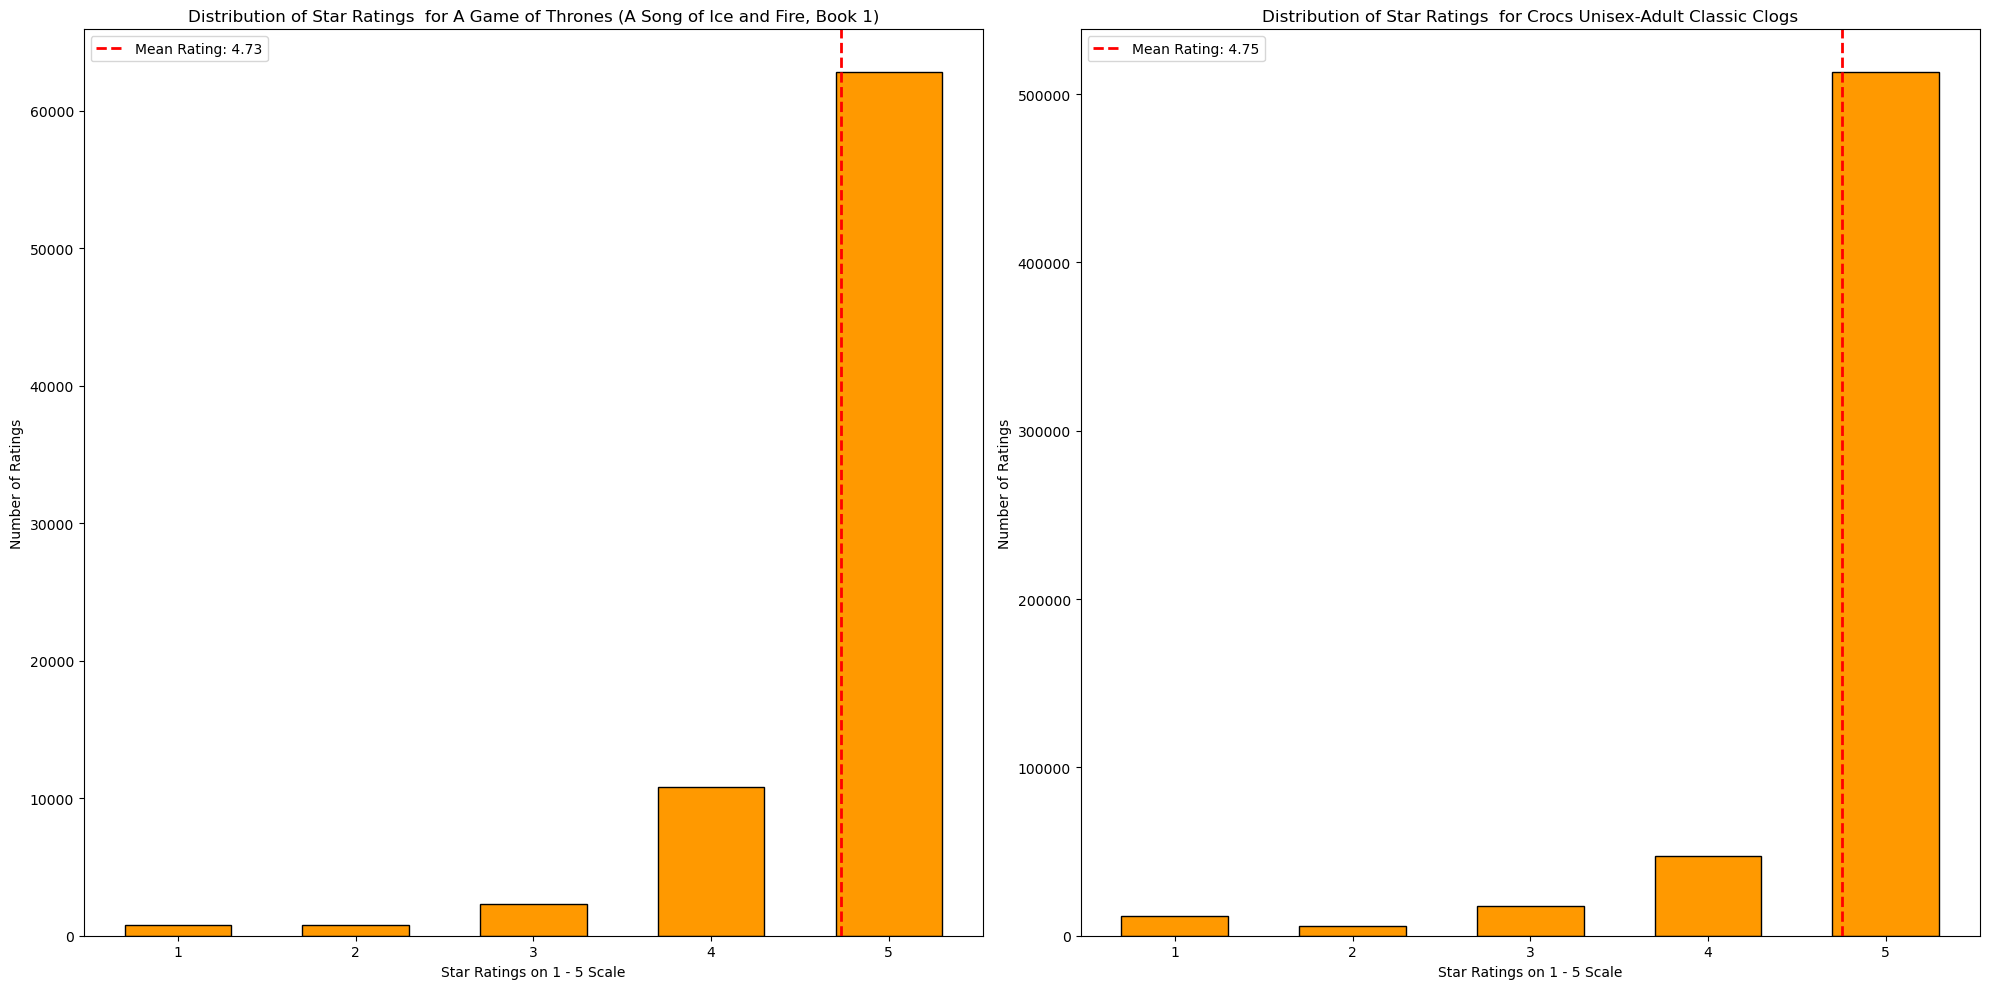

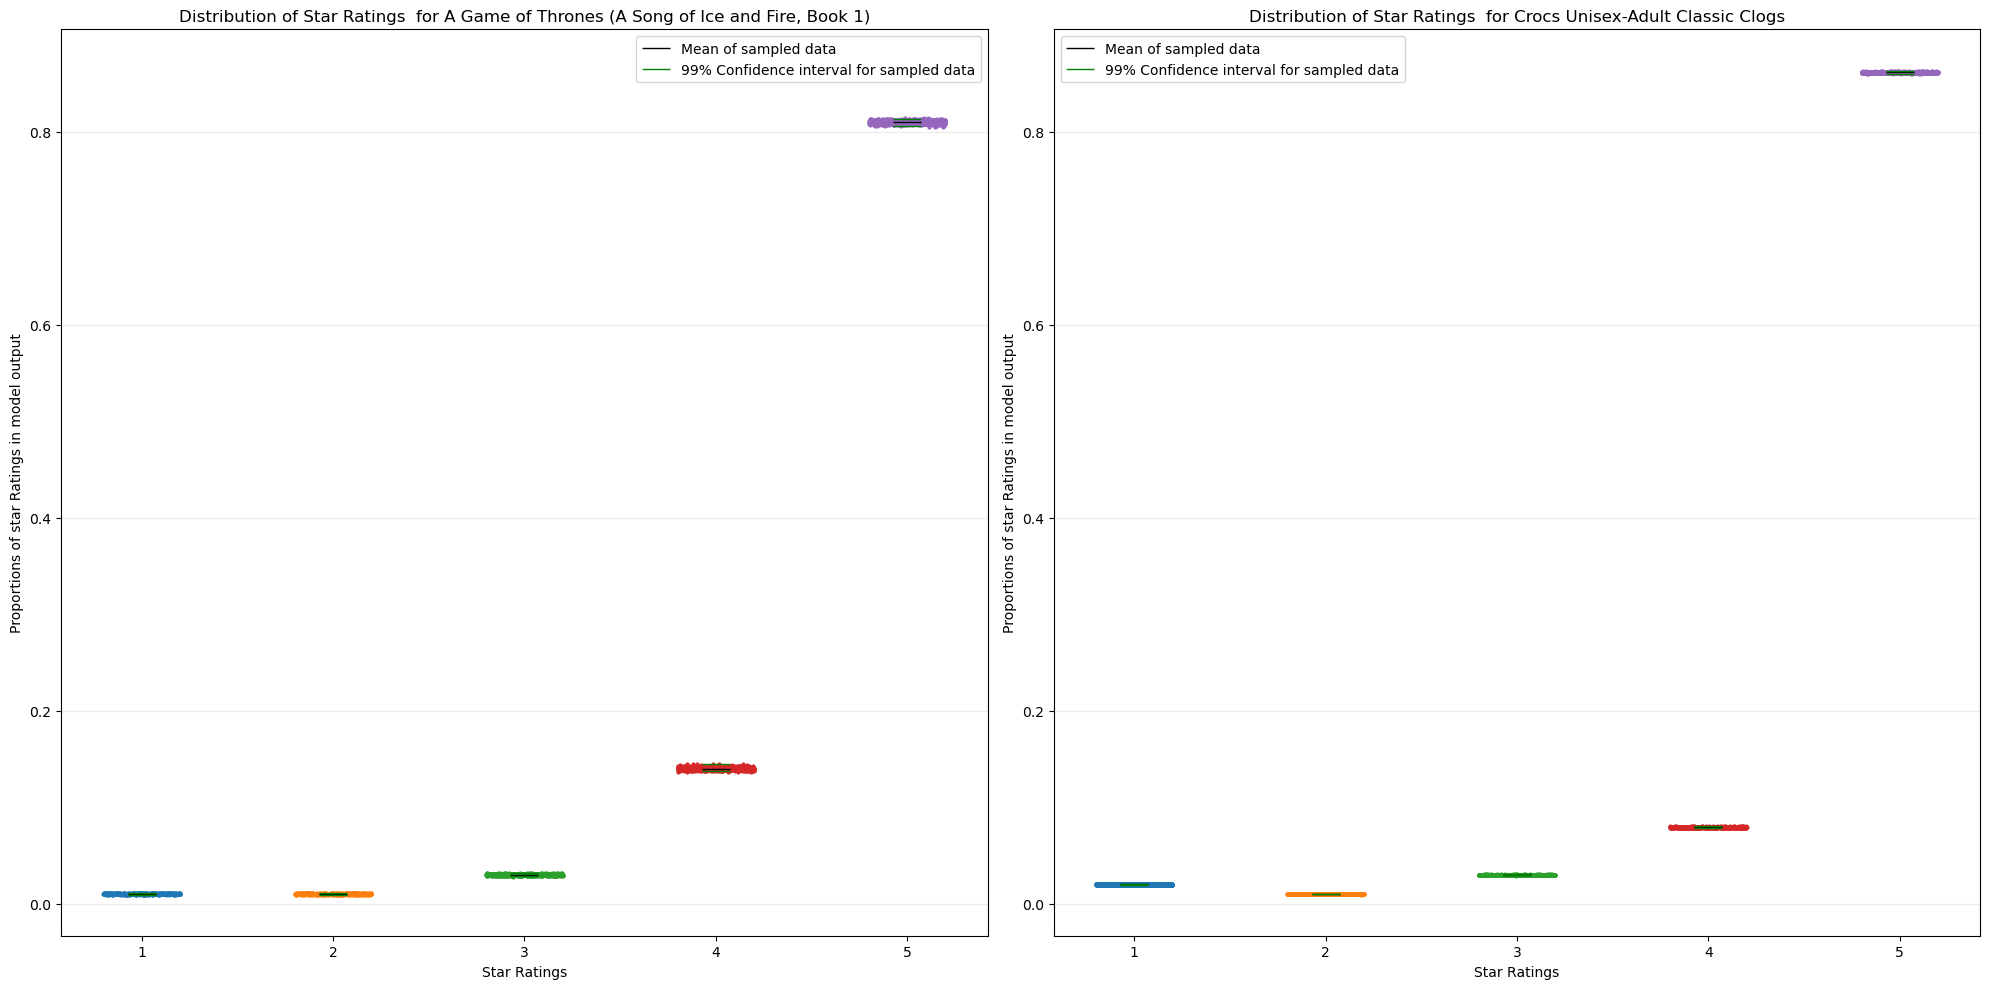

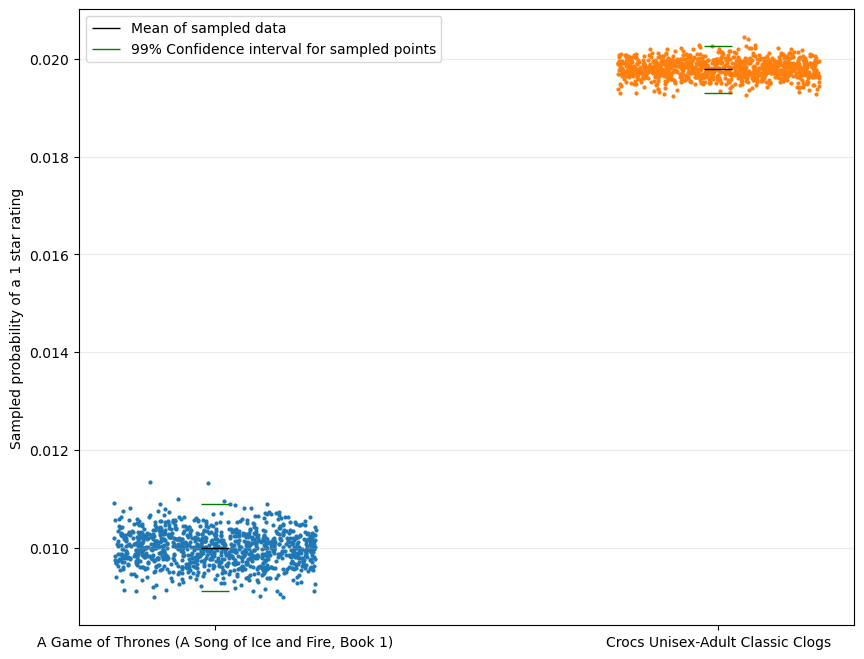

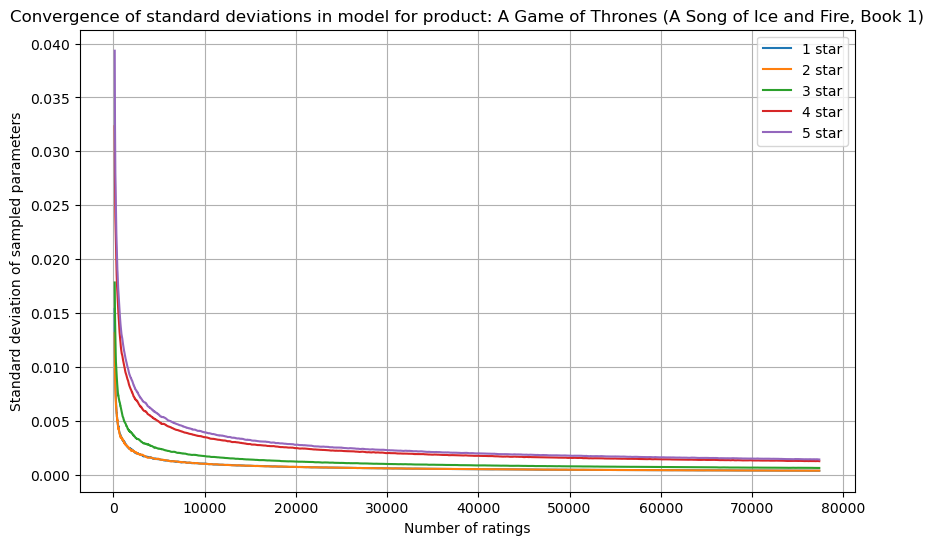

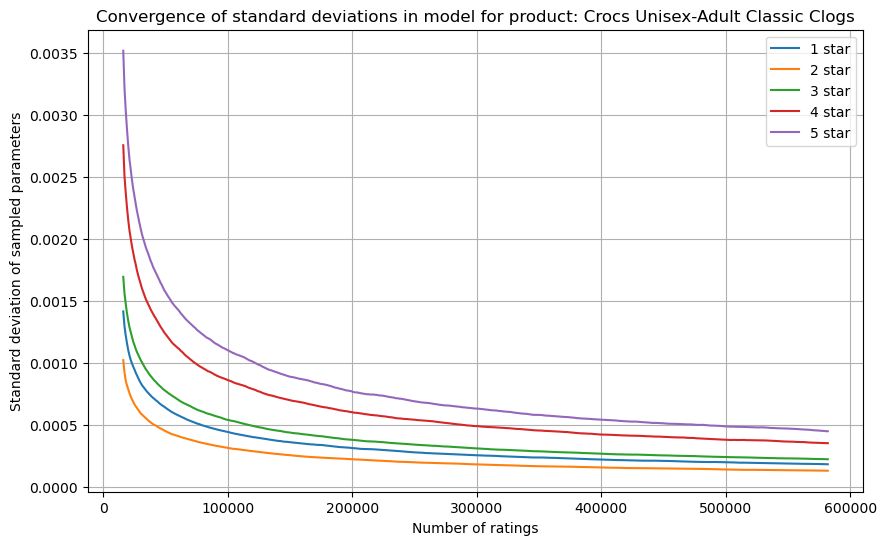

In [5]:
# Please run this code to perform analysis

User_friendly_analyzer.perform_analysis_based_on_user_input()